In [307]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Import and store the data in a data frame. (2.5 points)

In [308]:
df = pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat', delimiter='\s+')

In [309]:
df

,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL.1,70.19.1,111.03.1
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
5,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
6,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
7,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
8,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78
9,ABQ,ATL,212.49,1269,198.80,DL,68.39,226.79,AA,11.91,200.93


In [310]:
df.columns= ['City1','City2','AverageFare','Distance','AverageWeeklyPassengers','MarketLeadingAirline','MarketShare','Averagefare','LowPriceAirline','Marketshare','Price']

In [311]:
df

,City1,City2,AverageFare,Distance,AverageWeeklyPassengers,MarketLeadingAirline,MarketShare,Averagefare,LowPriceAirline,Marketshare,Price
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
5,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
6,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
7,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
8,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78
9,ABQ,ATL,212.49,1269,198.80,DL,68.39,226.79,AA,11.91,200.93


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
City1                      999 non-null object
City2                      999 non-null object
AverageFare                999 non-null float64
Distance                   999 non-null int64
AverageWeeklyPassengers    999 non-null float64
MarketLeadingAirline       999 non-null object
MarketShare                999 non-null float64
Averagefare                999 non-null float64
LowPriceAirline            999 non-null object
Marketshare                999 non-null float64
Price                      999 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 85.9+ KB


In [313]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageFare,999.0,163.424374,55.371544,50.52,126.025,161.36,197.435,401.23
Distance,999.0,1057.502503,643.307320,108.00,554.000,919.00,1455.000,2724.00
AverageWeeklyPassengers,999.0,672.527107,766.863056,181.41,257.115,404.78,770.265,8950.76
MarketShare,999.0,60.118519,19.374859,17.68,46.510,59.06,73.520,100.00
Averagefare,999.0,166.703233,62.666775,50.52,124.120,161.44,203.105,490.03
Marketshare,999.0,34.515806,27.087067,1.06,13.190,26.12,52.950,100.00
Price,999.0,143.225285,47.241860,49.61,113.825,137.83,168.540,387.94


In [314]:
df['City1'] = df['City1'].astype('category')

In [315]:
df['City2'] = df['City2'].astype('category')

In [316]:
df['MarketLeadingAirline'] = df['MarketLeadingAirline'].astype('category')

In [317]:
df['LowPriceAirline'] = df['LowPriceAirline'].astype('category')

Remove the outliers from the data (5 points)

In [318]:
z= np.abs(stats.zscore(df.select_dtypes(exclude=['category'])))

In [319]:
df1 = df[(z<3).all(axis=1)] # removing outliers

In [320]:
df1.shape

(965, 11)

In [321]:
df1

,City1,City2,AverageFare,Distance,AverageWeeklyPassengers,MarketLeadingAirline,MarketShare,Averagefare,LowPriceAirline,Marketshare,Price
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
5,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
6,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
7,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
8,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78
9,ABQ,ATL,212.49,1269,198.80,DL,68.39,226.79,AA,11.91,200.93


Question : Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.  

In [322]:
DependentVariable = df1['AverageFare']

In [323]:
DependentVariable

0      122.47
1      214.42
2       69.40
3      158.13
4      135.17
5      152.85
6      190.73
7      129.35
8      134.17
9      212.49
10     173.56
11     170.67
12     120.24
13     168.69
14     154.40
15     114.24
16     132.29
17     181.99
18     233.05
19     162.21
20     161.74
21      71.57
22     163.63
23     134.42
24     165.69
25      77.82
26     227.93
27      74.82
28     120.50
29     205.24
        ...  
966    142.71
967    143.99
968    102.95
969    110.64
970     98.36
971    263.37
972    165.13
973    177.77
974    215.04
975    122.02
976     82.34
977    148.62
978    177.91
979     74.62
981    134.18
982    116.78
983    237.26
985     77.11
986    105.84
987    144.22
989    156.01
990     70.61
991    162.46
992    131.47
993    288.14
994    136.16
995     83.28
996    159.97
997     73.57
998    126.67
Name: AverageFare, Length: 965, dtype: float64

In [324]:
df2= df1.drop('AverageFare',axis=1)

In [325]:
df2

,City1,City2,Distance,AverageWeeklyPassengers,MarketLeadingAirline,MarketShare,Averagefare,LowPriceAirline,Marketshare,Price
0,CAK,MCO,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
5,ALB,LAS,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
6,ALB,LAX,2467,191.95,DL,17.89,205.06,US,16.59,174.00
7,ALB,MCO,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
8,ALB,TPA,1130,202.93,US,35.40,132.91,DL,26.40,124.78
9,ABQ,ATL,1269,198.80,DL,68.39,226.79,AA,11.91,200.93


Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [326]:
df1.corr()

,AverageFare,Distance,AverageWeeklyPassengers,MarketShare,Averagefare,Marketshare,Price
AverageFare,1.000000,0.551675,-0.222545,-0.227790,0.981087,-0.475423,0.859290
Distance,0.551675,1.000000,-0.164988,-0.533157,0.525710,-0.364493,0.557433
AverageWeeklyPassengers,-0.222545,-0.164988,1.000000,0.033002,-0.191247,0.078639,-0.254508
MarketShare,-0.227790,-0.533157,0.033002,1.000000,-0.214001,0.298430,-0.314345
Averagefare,0.981087,0.525710,-0.191247,-0.214001,1.000000,-0.499035,0.817193
Marketshare,-0.475423,-0.364493,0.078639,0.298430,-0.499035,1.000000,-0.248961
Price,0.859290,0.557433,-0.254508,-0.314345,0.817193,-0.248961,1.000000


In [327]:
df2 = df1.corr()
df2 = df2[df2['AverageFare'] > 0.1]
df2

,AverageFare,Distance,AverageWeeklyPassengers,MarketShare,Averagefare,Marketshare,Price
AverageFare,1.000000,0.551675,-0.222545,-0.227790,0.981087,-0.475423,0.859290
Distance,0.551675,1.000000,-0.164988,-0.533157,0.525710,-0.364493,0.557433
Averagefare,0.981087,0.525710,-0.191247,-0.214001,1.000000,-0.499035,0.817193
Price,0.859290,0.557433,-0.254508,-0.314345,0.817193,-0.248961,1.000000


In [328]:
df3 = df1.drop(labels=['City1' , 'City2' , 'AverageFare' , 'AverageWeeklyPassengers' , 'MarketLeadingAirline','MarketShare', 'LowPriceAirline' , 'Marketshare' ], axis=1)
df3

,Distance,Averagefare,Price
0,860,123.09,118.94
1,852,223.98,167.12
2,288,68.86,68.86
3,723,161.36,145.42
4,1204,137.97,127.69
5,2237,148.59,148.59
6,2467,205.06,174.00
7,1073,127.69,127.69
8,1130,132.91,124.78
9,1269,226.79,200.93


Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

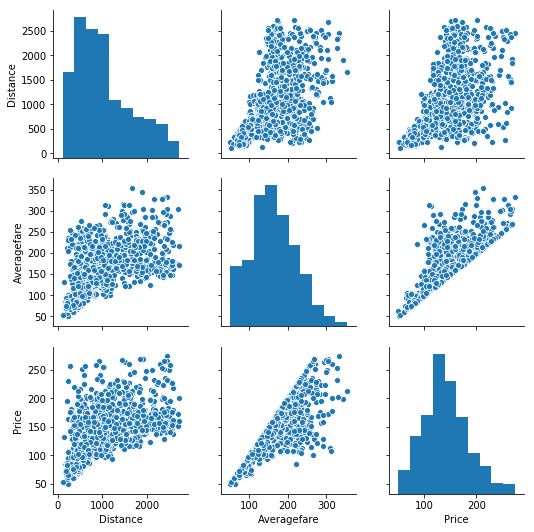

In [329]:
sns.pairplot(df3)

AxesSubplot(0.125,0.125;0.775x0.755)


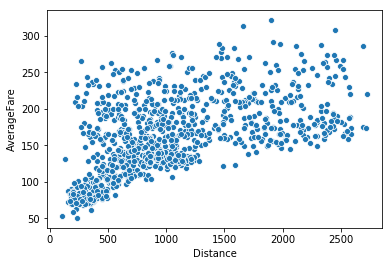

In [330]:
print(sns.scatterplot(x=df3['Distance'] ,y=TargetColumn))

AxesSubplot(0.125,0.125;0.775x0.755)


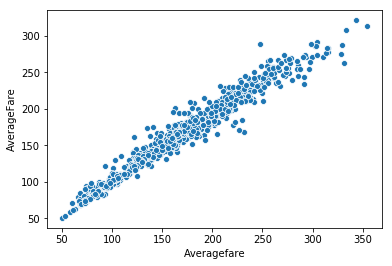

In [331]:
print(sns.scatterplot(x=df3['Averagefare'] , y=TargetColumn))

AxesSubplot(0.125,0.125;0.775x0.755)


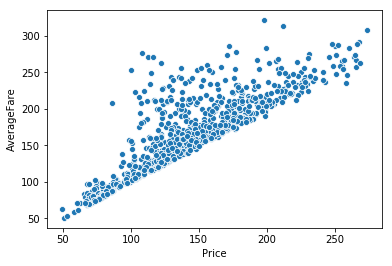

In [332]:
print(sns.scatterplot(x=df3['Price'] , y=TargetColumn))

Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [333]:
X_train, X_test, y_train, y_test = train_test_split(df3, DependentVariable, test_size=0.25, random_state=55)

In [334]:
regression_model = LinearRegression()

In [335]:
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [336]:
X_train.columns

Index(['Distance', 'Averagefare', 'Price'], dtype='object')

Print the coefficients & intercepts of the linear regression model (5 points)

In [337]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for Distance is 0.0019278651862111164
The coefficient for Averagefare is 0.7532568787177721
The coefficient for Price is 0.19462868197568717


In [338]:
regression_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [339]:
intercept = regression_model.intercept_
print(intercept)

8.326700057635804


Print the accuracy of the overall model (2.5 points)

In [340]:
regression_model.score(X_test, y_test)

0.9765441711535925

In [341]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [342]:
import math

math.sqrt(mse)

7.751569927751583

In [343]:
y_pred = regression_model.predict(X_test)

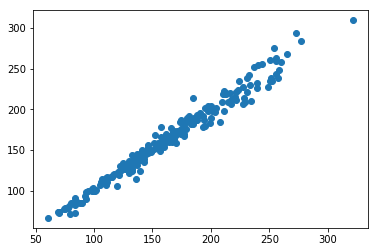

In [344]:
plt.scatter(y_test, y_pred)